In [1]:
# Import the actual code
from utils import extract_authors
from utils import clean_author_names
from utils import create_author_count_dataframe

In [2]:
# Import necessary libraries
import pandas as pd

In [3]:
# Define the method. This defines which dataset to use, based on TERRA: https://terra.cser.ac.uk/
# method can be "manual", "low_recall", "medium_recall", "high_recall"
method = "manual"

In [4]:
# Read in the data
bib = pd.read_csv("bibliography_" + method +".csv")
bib.head()

,Authors,Year,Title,Journal,Volume,Issue,DOI,Number_of_Assessments,Number_Relevant,Relevance
0,"Denkenberger D., Turchin A.",2018,Global catastrophic and existential risks comm...,Futures,NaN,NaN,10.1016/j.futures.2018.01.003,19,19,19.0
1,"Blair R.W., Denkenberger D.C.",2018,Interventions that may prevent or mollify supe...,Futures,NaN,NaN,10.1016/j.futures.2018.01.002,13,13,13.0
2,"Wintle B.C., Sutherland W.J., Rees M.J., Avin ...",2018,Classifying global catastrophic risks,Futures,NaN,NaN,10.1016/j.futures.2018.02.001,14,13,12.0
3,"Gloor L., Sotala K.",2017,Superintelligence as a cause or cure for risks...,Informatica (Slovenia),41,4,NaN,12,12,12.0
4,Halstead J.,2018,Stratospheric aerosol injection research and e...,Futures,NaN,NaN,10.1016/j.futures.2018.03.004,11,11,11.0


In [5]:
# Exclude the non relevant papers form the manual list
if method == "manual":
    bib = bib[bib["Relevance"] > 0]

In [6]:
# Drop all rows where authors are not present
bib = bib.dropna(subset=['Authors'])

In [7]:
# Extract the names and put them all in one list
authors = extract_authors(bib)
print (authors[:10])

['Denkenberger D.', 'Turchin A.', 'Blair R.W.', 'Denkenberger D.C.', 'Wintle B.C.', 'Sutherland W.J.', 'Rees M.J.', 'Avin S.', 'Weitzdörfer J.', 'Ó hÉigeartaigh S.S.']


In [8]:
# Unify the names in the same format of lastname + first initial.
cleaned_authors = clean_author_names(authors)
print(cleaned_authors[:10])

['Denkenbergerd', 'Turchina', 'Blairr', 'Denkenbergerd', 'Wintleb', 'Sutherlandw', 'Reesm', 'Avins', 'Weitzdörferj', 'Óhéigeartaighs']


In [9]:
# Create the dataframe with all the names and counts
count_df = create_author_count_dataframe(cleaned_authors)
# Sort by count
count_df = count_df.sort_values('Count', ascending=False)
count_df.head()

,Count,Name
15,28,S. Baum
0,27,D. Denkenberger
22,20,J. Pearce
126,15,N. Bostrom
233,15,R. Yampolskiy


In [10]:
# Reset the index of the dataframe
count_df.reset_index(inplace=True, drop=True)
count_df.head()

,Count,Name
0,28,S. Baum
1,27,D. Denkenberger
2,20,J. Pearce
3,15,N. Bostrom
4,15,R. Yampolskiy


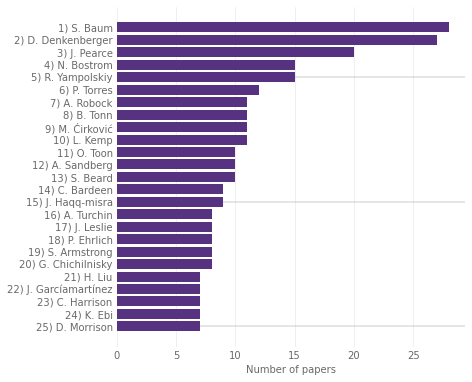

In [11]:
import matplotlib.pyplot as plt
plt.style.use("https://raw.githubusercontent.com/allfed/ALLFED-matplotlib-style-sheet/main/ALLFED.mplstyle")

# Plot the first x names
x = 25
selection = count_df.iloc[0:x, :]

# Sort the selection DataFrame in ascending order by the 'Count' column
sorted_selection = selection.sort_values(by='Count', ascending=True)

# Create labels with descending numbers and names
labels = [f"{x - i}) {name}" for i, name in enumerate(sorted_selection['Name'])]

# Create the plot
fig, ax = plt.subplots(figsize=(x / 4, x / 4))
ax.barh(labels, sorted_selection['Count'], color="#573280")
ax.yaxis.grid(False)
ax.set_xlabel("Number of papers")

# Add a vertical line for every 10th name
for i in range(0, x, 10):
    ax.axhline(i, color='black', alpha=0.1, zorder=0)

# Make the background opaque
fig.patch.set_alpha(1)

plt.savefig("author_count_" + method + ".png", dpi=300, bbox_inches='tight')
plt.show()


In [12]:
# Make a dictionary of names and their affiliation. 
affiliations = {
    "S. Baum": "GCRI",
    "D. Denkenberger": "ALLFED",
    "J. Pearce": "ALLFED",
    "N. Bostrom": "FHI",
    "R. Yampolskiy": "University of Louisville",
    "P. Torres": "CSER",
    "M. Ćirković": "Astronomical Observatory of Belgrade",
    "B. Tonn": "University of Tennessee",
    "A. Robock": "Rutgers University",
    "O. Toon": "University of Colorado",
    "J. Haqq-misra": "Blue Marble Space Institute of Science",
    "L. Kemp": "CSER",
    "A. Sandberg": "FHI",
    "A. Turchin": "ALLFED",
    "C. Bardeen": "National Center for Atmospheric Research",
    "J. Leslie": "University of Guelph",
    "G. Chichilnisky": "Columbia University",
    "S. Armstrong": "FHI",
    "P. Ehrlich": "Stanford University",
    "H. Liu": "University of Copenhagen",
    "J. Garcíamartínez": "ALLFED",
    "D. Morrison": "Ames Research Center",
    "R. Grieve": "University of Western Ontario",
    "R. Tol": "University of Sussex",
    "O. Häggström": "Chalmers University of Technology"
}

In [13]:
# Assign the people in the count_df an affilation based on the affiliation dictionary
count_df['Affiliation'] = count_df['Name'].map(affiliations)
count_df.head()

,Count,Name,Affiliation
0,28,S. Baum,GCRI
1,27,D. Denkenberger,ALLFED
2,20,J. Pearce,ALLFED
3,15,N. Bostrom,FHI
4,15,R. Yampolskiy,University of Louisville


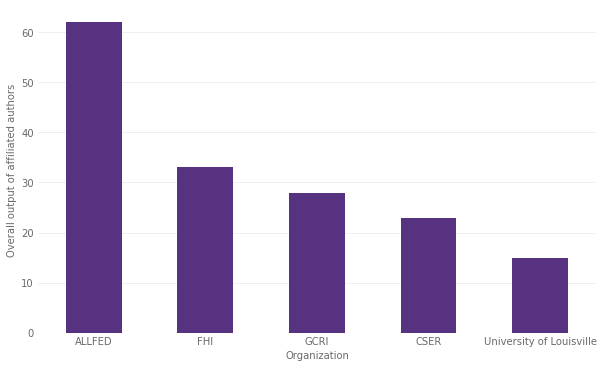

In [14]:
# Group by Affiliation and add up the counts
grouped_affiliation = count_df.groupby('Affiliation').sum()
# Sort the values in descending order
sorted_affiliation = grouped_affiliation.sort_values(by='Count', ascending=False)
# Make a bar plot of the top 5 affiliation
fig, ax = plt.subplots(figsize=(6, 6))
sorted_affiliation.head(5).plot(ax=ax, kind='bar', figsize=(10,6), rot=0, color="#573280", legend=False)
ax.xaxis.grid(False)
ax.set_xlabel("Organization")
ax.set_ylabel("Overall output of affiliated authors")

# Make the background opaque
fig.patch.set_alpha(1)

plt.savefig("org_count_" + method + ".png", dpi=300, bbox_inches='tight')
plt.show()